Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.77      0.68      0.72       148

    accuracy                           1.00     85443
   macro avg       0.88      0.84      0.86     85443
weighted avg       1.00      1.00      1.00     85443

Confusion Matrix:
[[85265    30]
 [   48   100]]


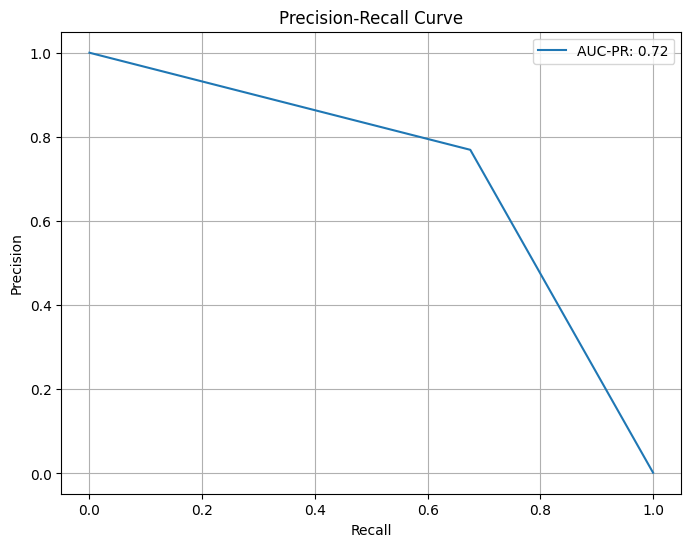

In [7]:
# Importing necessary libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, auc

# Load the dataset
# Update the path to your dataset file
data = pd.read_csv("creditcard.csv")

# Feature selection and target variable
X = data.drop(columns=["Class"])  # Features
y = data["Class"]                 # Target (0: Non-fraud, 1: Fraud)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Initialize the Decision Tree Classifier
# 'class_weight="balanced"' handles the class imbalance
decision_tree = DecisionTreeClassifier(class_weight="balanced", random_state=42)

# Train the model
decision_tree.fit(X_train, y_train)

# Predictions
y_pred = decision_tree.predict(X_test)
y_pred_prob = decision_tree.predict_proba(X_test)[:, 1]

# Evaluation
# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)
auc_pr = auc(recall, precision)

# Plot the Precision-Recall Curve
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f"AUC-PR: {auc_pr:.2f}")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.grid()
plt.show()